Rydberg constant (m=+1) R = 1.17e+07 ± 6.37e+05 m⁻¹
Rydberg constant (m=+2) R = 1.13e+07 ± 4.92e+05 m⁻¹


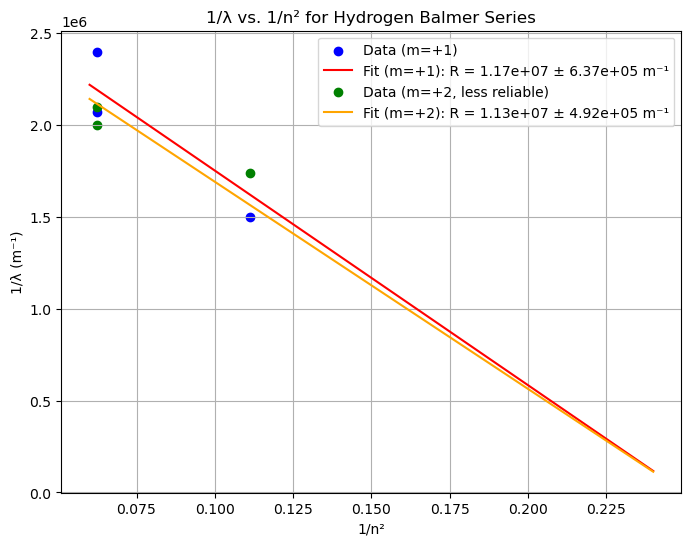

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data from Exercise 8 (hand-calculated wavelengths)
wavelengths_m1 = np.array([417.1, 482.7, 668.1]) * 1e-9  # m (m=+1)
wavelengths_m2 = np.array([477.4, 499.8, 574.8]) * 1e-9  # m (m=+2)
n2_values_m1 = np.array([4, 4, 3])  # Balmer series n for m=+1
n2_values_m2 = np.array([4, 4, 3])  # Balmer series n for m=+2
inv_lambda_m1 = 1 / wavelengths_m1
inv_lambda_m2 = 1 / wavelengths_m2

# Define the fitting function: 1/λ = R (1/4 - 1/n²)
def ryder_func(inv_n2, R):
    return R * (1/4 - inv_n2)

# Fit for m=+1
inv_n2_m1 = 1 / n2_values_m1**2
popt_m1, pcov_m1 = curve_fit(ryder_func, inv_n2_m1, inv_lambda_m1)
R_fit_m1 = popt_m1[0]
R_err_m1 = np.sqrt(np.diag(pcov_m1))[0]

# Fit for m=+2
inv_n2_m2 = 1 / n2_values_m2**2
popt_m2, pcov_m2 = curve_fit(ryder_func, inv_n2_m2, inv_lambda_m2)
R_fit_m2 = popt_m2[0]
R_err_m2 = np.sqrt(np.diag(pcov_m2))[0]

# Generate fit lines, avoiding n = 4
n2_fit = np.linspace(0.06, 0.24, 100)
lambda_fit_m1 = 1 / (R_fit_m1 * (1/4 - n2_fit))
lambda_fit_m2 = 1 / (R_fit_m2 * (1/4 - n2_fit))

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(inv_n2_m1, inv_lambda_m1, color='blue', label='Data (m=+1)')
plt.plot(n2_fit, 1/lambda_fit_m1, color='red', label=f'Fit (m=+1): R = {R_fit_m1:.2e} ± {R_err_m1:.2e} m⁻¹')
plt.scatter(inv_n2_m2, inv_lambda_m2, color='green', label='Data (m=+2, less reliable)')
plt.plot(n2_fit, 1/lambda_fit_m2, color='orange', label=f'Fit (m=+2): R = {R_fit_m2:.2e} ± {R_err_m2:.2e} m⁻¹')
plt.xlabel('1/n²')
plt.ylabel('1/λ (m⁻¹)')
plt.title('1/λ vs. 1/n² for Hydrogen Balmer Series')
plt.grid(True)
plt.legend()
plt.savefig('rydberg_fit_both.png')
print(f"Rydberg constant (m=+1) R = {R_fit_m1:.2e} ± {R_err_m1:.2e} m⁻¹")
print(f"Rydberg constant (m=+2) R = {R_fit_m2:.2e} ± {R_err_m2:.2e} m⁻¹")

Effective Rydberg constant for Helium: R = 1.13e+07 ± 7.30e+05 m⁻¹


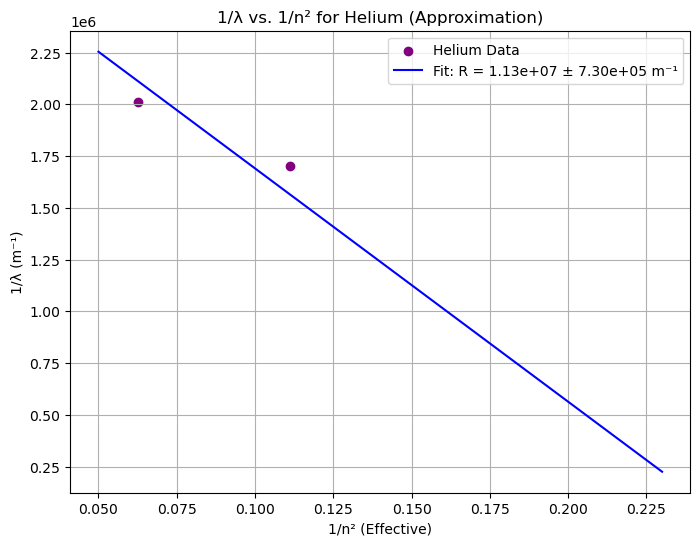

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Helium data (averaged wavelengths)
wavelengths_he = np.array([587.4, 497.0]) * 1e-9  # m
n2_values_he = np.array([3, 4])  # Effective n₂ for approximation
inv_lambda_he = 1 / wavelengths_he

# Fitting function: 1/λ = R (1/n1² - 1/n2²), with n1 = 2
def ryder_func(inv_n2, R):
    return R * (1/4 - inv_n2)

inv_n2_he = 1 / n2_values_he**2
popt_he, pcov_he = curve_fit(ryder_func, inv_n2_he, inv_lambda_he)
R_fit_he = popt_he[0]
R_err_he = np.sqrt(np.diag(pcov_he))[0]

# Generate fit line
n2_fit = np.linspace(0.05, 0.23, 100)
lambda_fit_he = 1 / (R_fit_he * (1/4 - n2_fit))

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(inv_n2_he, inv_lambda_he, color='purple', label='Helium Data')
plt.plot(n2_fit, 1/lambda_fit_he, color='blue', label=f'Fit: R = {R_fit_he:.2e} ± {R_err_he:.2e} m⁻¹')
plt.xlabel('1/n² (Effective)')
plt.ylabel('1/λ (m⁻¹)')
plt.title('1/λ vs. 1/n² for Helium (Approximation)')
plt.grid(True)
plt.legend()
plt.savefig('helium_rydberg_fit.png')
print(f"Effective Rydberg constant for Helium: R = {R_fit_he:.2e} ± {R_err_he:.2e} m⁻¹")